## The Debt to Gdp Ratio is an important factor in understanding a country's financial soundness or stabilty. 
## Overall a Debt to GDP Ratio of below 60% is considered to be good. 
## In this module, we are trying to forecast the Debt to GDP Ratio based on the historical data provided by the International Monetary Fund (IMF) specifically for India!!
 

### import necessary packages

In [1310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import warnings
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
from datetime import datetime, timedelta
from statsmodels.tsa.statespace.sarimax import SARIMAX

warnings.filterwarnings("ignore")
%matplotlib inline

### reading the file (Source:IMF)

In [1158]:
data = pd.read_csv("../data/debt_to_GDP.csv")
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Attribute,1800,1801,1802,1803,1804,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 226
0,Papua New Guinea,853,Gross Government Debt,GGXWDG,Value,NaN,NaN,NaN,NaN,NaN,...,8.565531e+09,1.176576e+10,1.482730e+10,1.580891e+10,1.616781e+10,1.670647e+10,1.667034e+10,1.633275e+10,1.552917e+10,NaN
1,Paraguay,288,Gross Government Debt,GGXWDG,Value,NaN,NaN,NaN,NaN,NaN,...,1.760297e+13,2.096252e+13,2.633586e+13,3.298367e+13,3.828361e+13,4.343323e+13,4.902607e+13,5.462696e+13,6.051216e+13,NaN
2,Peru,293,Gross Government Debt,GGXWDG,Value,NaN,NaN,NaN,NaN,NaN,...,1.077037e+11,1.110170e+11,1.193030e+11,1.350758e+11,1.550643e+11,1.683184e+11,1.783528e+11,1.863985e+11,1.995994e+11,NaN
3,Philippines,566,Gross Government Debt,GGXWDG,Value,NaN,NaN,NaN,NaN,NaN,...,4.288804e+12,4.529800e+12,4.602500e+12,4.853522e+12,5.038158e+12,5.246268e+12,5.472505e+12,5.722527e+12,5.997655e+12,NaN
4,Poland,964,Gross Government Debt,GGXWDG,Value,NaN,NaN,NaN,NaN,NaN,...,8.784150e+11,9.261160e+11,8.665020e+11,9.144117e+11,9.600945e+11,1.011376e+12,1.059549e+12,1.101687e+12,1.146170e+12,NaN


### Data cleansing and Processing

In [1162]:
# filtering out the relevant information
debt_to_GDP_India = data.loc[(data['Country Name']== 'India') & (data['Indicator Name']=='Debt to GDP Ratio')]

# cleaning and processing the data
debt_to_GDP_India.dropna(axis=1, inplace=True)
debt_to_GDP_India = debt_to_GDP_India.iloc[:, 5:]
tsa_debt_to_GDP_India = debt_to_GDP_India.melt(var_name="Year", value_name="Debt_to_GDP")
tsa_debt_to_GDP_India.Year = pd.to_datetime(tsa_debt_to_GDP_India.Year)
tsa_debt_to_GDP_India = tsa_debt_to_GDP_India.sort_values('Year')
tsa_debt_to_GDP_India.set_index('Year', inplace=True)

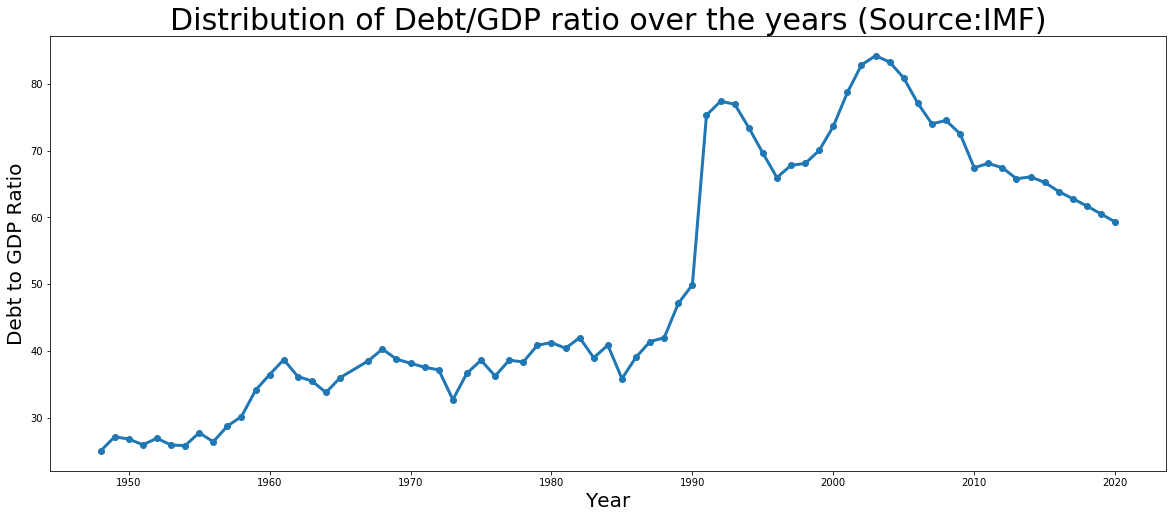

In [1164]:
#plotting the distribution over time
fig = plt.figure(figsize=(20,8))
plt.plot(tsa_debt_to_GDP_India, linewidth=3, marker='o')
plt.ylabel('Debt to GDP Ratio', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.title('Distribution of Debt/GDP ratio over the years (Source:IMF)', fontsize=30)
plt.show()

In [1165]:
#interactive diagram
#fig1 = go.Figure()
#fig1.add_trace(go.Scatter(x=tsa_debt_to_GDP_India.index, y = tsa_debt_to_GDP_India['Debt_to_GDP'], mode='lines+markers'))
#fig1.update_layout(title_text='Distribution of Debt/GDP ratio over the years (Source:IMF)')

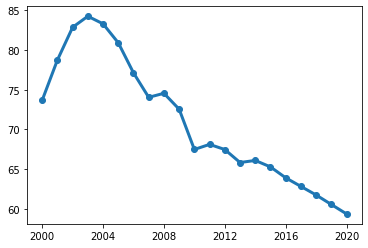

In [1166]:
#converting the pandas into a series
tsa_debt_to_GDP_India = tsa_debt_to_GDP_India[tsa_debt_to_GDP_India.index > '1999'].squeeze()
plt.plot(tsa_debt_to_GDP_India, linewidth=3, marker='o')

### First we check the stationarity of the time series here, at the first look just from the naked eye it clearly seemed to be a non-stationay time series mainly because of the volatile mean and variance butr we will still perfrom some statistical testing to confirm this claim, 

1. Rolling mean and std-dev
2. Dicky-Fuller Test

In [957]:
def test_stationarity(timeseries, rolling_window):
    fig = plt.figure(figsize=(20,8))
    #Determing rolling statistics
    rolmean = timeseries.rolling(rolling_window).mean()
    rolstd = timeseries.rolling(rolling_window).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)  

### Checking the stationarity

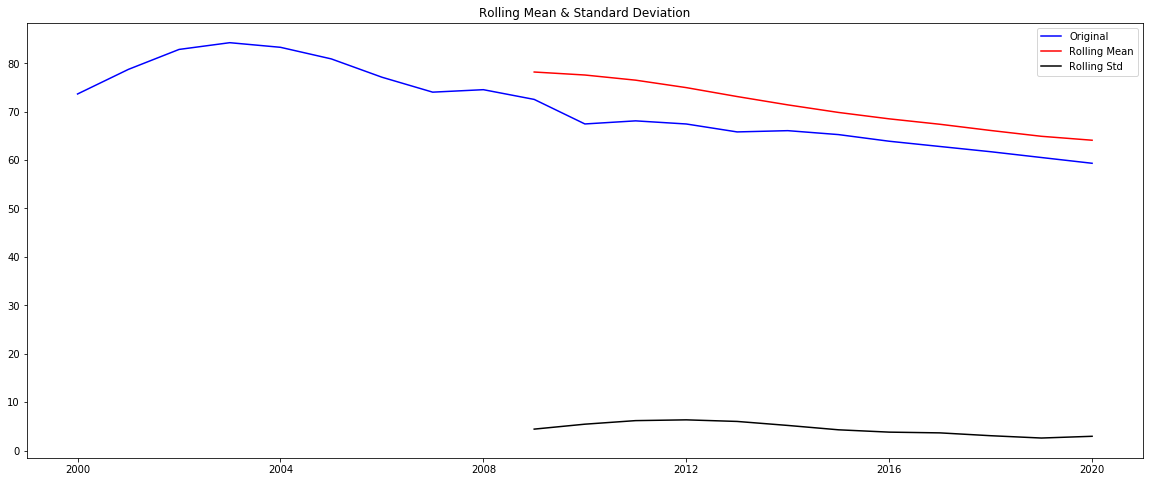

Results of Dickey-Fuller Test:
Test Statistic                 -0.945083
p-value                         0.772764
#Lags Used                      2.000000
Number of Observations Used    18.000000
Critical Value (1%)            -3.859073
Critical Value (5%)            -3.042046
Critical Value (10%)           -2.660906
dtype: float64


In [958]:
test_stationarity(tsa_debt_to_GDP_India, 10)  

As we can cleary observe from the above results that the P-Value > significance level of (0.05, 95% confidence interval) and in other the Test statistic is not less than the critical value of the same confidence interval. So, we can't reject the null hypothesis and conclude that the time series is not stationary. 
($H_{0}$= 'the timeseries is not stationary')

# Making the timeseries stationary

## Log Transformation

In [959]:
tsa_debt_to_GDP_India_log = np.log(tsa_debt_to_GDP_India)
tsa_debt_to_GDP_India_log

Year
2000-01-01    4.299310
2001-01-01    4.366005
2002-01-01    4.417031
2003-01-01    4.433706
2004-01-01    4.422312
2005-01-01    4.393136
2006-01-01    4.345211
2007-01-01    4.304423
2008-01-01    4.311284
2009-01-01    4.283953
2010-01-01    4.211500
2011-01-01    4.220925
2012-01-01    4.211404
2013-01-01    4.186817
2014-01-01    4.190763
2015-01-01    4.178381
2016-01-01    4.157155
2017-01-01    4.139976
2018-01-01    4.122641
2019-01-01    4.103068
2020-01-01    4.083227
Name: Debt_to_GDP, dtype: float64

### Checking the stationarity

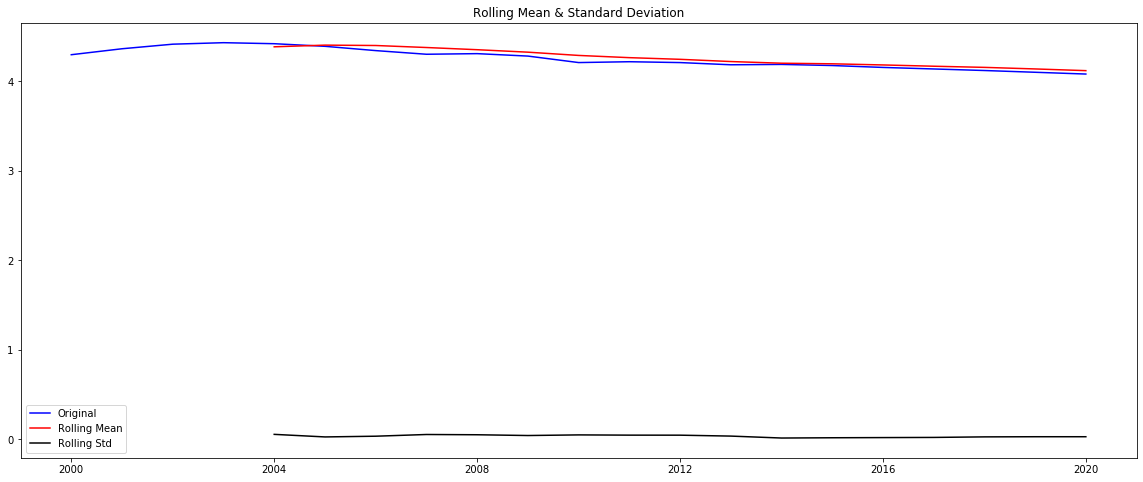

Results of Dickey-Fuller Test:
Test Statistic                 -0.640501
p-value                         0.861565
#Lags Used                      2.000000
Number of Observations Used    18.000000
Critical Value (1%)            -3.859073
Critical Value (5%)            -3.042046
Critical Value (10%)           -2.660906
dtype: float64


In [960]:
test_stationarity(tsa_debt_to_GDP_India_log, 5)

## As we see it's still not satisfying the conditions of stationarity

## Differencing

In [1027]:
tsa_debt_to_GDP_India_log_diff = tsa_debt_to_GDP_India_log - tsa_debt_to_GDP_India_log.shift()
tsa_debt_to_GDP_India_log_diff.dropna(inplace=True)

In [1028]:
#tsa_debt_to_GDP_India_diff = tsa_debt_to_GDP_India - tsa_debt_to_GDP_India.shift()
#tsa_debt_to_GDP_India_diff.dropna(inplace=True)

### Checking the stationarity

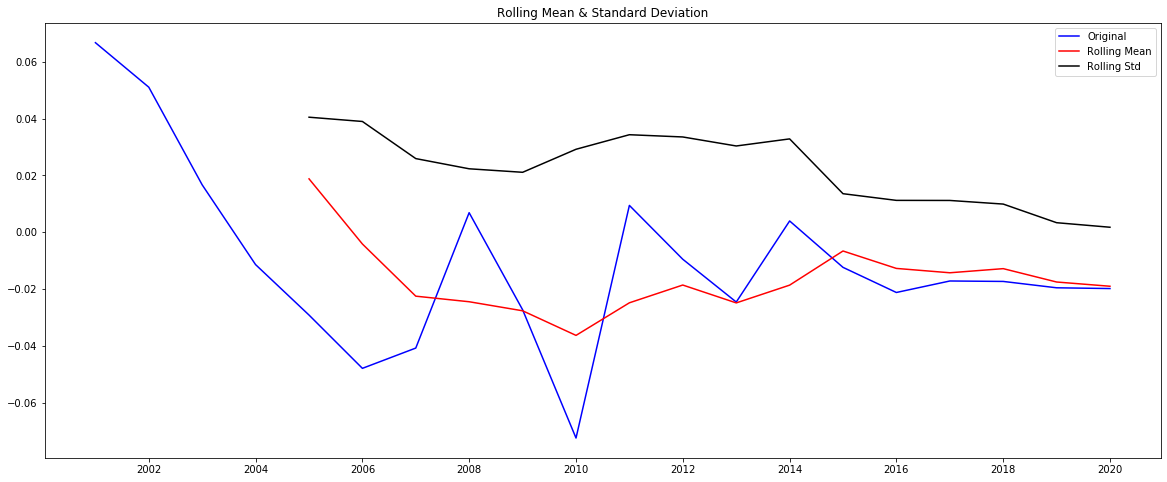

Results of Dickey-Fuller Test:
Test Statistic                 -3.444122
p-value                         0.009544
#Lags Used                      8.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


In [1032]:
test_stationarity(tsa_debt_to_GDP_India_log_diff, 5)

As we can cleary observe from the above results that the P-Value < significance level of (0.01, 99% confidence interval) and in other the Test statistic is less than the critical value of the same confidence interval. So, we can reject the null hypothesis and conclude that the time series is stationary. 
($H_{0}$= 'the timeseries is not stationary')

# ACF plot

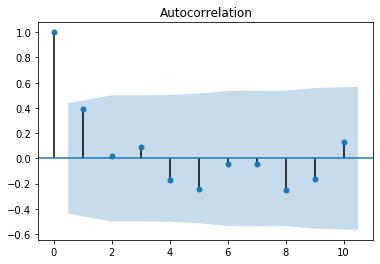

In [1033]:
acf_plot = plot_acf(tsa_debt_to_GDP_India_log_diff, lags=10)

### We can cleary see from the ACF plot that there's is not much correlation infact statistically zero corrletion between the lags 

# PACF plot

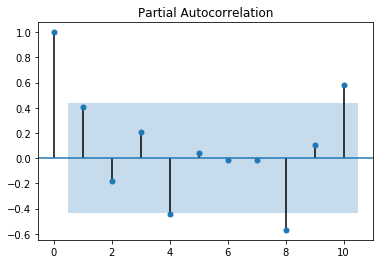

In [1034]:
pacf_plot = plot_pacf(tsa_debt_to_GDP_India_log_diff, lags=10)

### Based on PACF, we should start with an Auto Regressive model with lags 4, 8 and 10

## Preparing the train and test set

In [991]:
train_end = datetime(2016,1,1)
test_end = datetime(2020,1,1)
train_data = tsa_debt_to_GDP_India_log_diff[:train_end-timedelta(days=1)].squeeze()
test_data = tsa_debt_to_GDP_India_log_diff[train_end:test_end].squeeze()

In [992]:
train_data.head()

Year
2001-01-01    0.066694
2002-01-01    0.051027
2003-01-01    0.016675
2004-01-01   -0.011394
2005-01-01   -0.029176
Name: Debt_to_GDP, dtype: float64

In [993]:
test_data

Year
2016-01-01   -0.021225
2017-01-01   -0.017179
2018-01-01   -0.017336
2019-01-01   -0.019573
2020-01-01   -0.019840
Name: Debt_to_GDP, dtype: float64

# Fitting the AR Model

In [994]:
#create the model
model = ARMA(train_data, order=(4,0))

In [995]:
import time as t
#fit the model
start = t.time()
model_fit = model.fit()
end = t.time()
print('Model Fitting Time:', end - start)

Model Fitting Time: 0.16649198532104492


In [996]:
#summary of the model
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:            Debt_to_GDP   No. Observations:                   15
Model:                     ARMA(4, 0)   Log Likelihood                  32.751
Method:                       css-mle   S.D. of innovations              0.026
Date:                Thu, 07 May 2020   AIC                            -53.503
Time:                        21:31:23   BIC                            -49.254
Sample:                    01-01-2001   HQIC                           -53.548
                         - 01-01-2015                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0070      0.014     -0.488      0.625      -0.035       0.021
ar.L1.Debt_to_GDP     0.7176      0.236      3.039      0.002       0.255       1.181
ar.L2.Debt_to_GDP    -0.

## The ARMA(4,0) model based on the summary:
### $\hat{y_t} = 0.7176y_{t-1} -0.4747y_{t-4}$ 

In [997]:
#get prediction start and end dates
#pred_start_date = test_data.index[0]
#pred_end_date = test_data.index[-1]

In [998]:
#get the predictions and residuals
predictions = model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)
d = {'Year': test_data.index, 'Debt_to_GDP': predictions.values}
final_predictions = pd.DataFrame(data=d).set_index('Year').squeeze()
final_predictions

Year
2016-01-01   -0.021099
2017-01-01   -0.002052
2018-01-01   -0.006901
2019-01-01   -0.012388
2020-01-01   -0.001886
Name: Debt_to_GDP, dtype: float64

# Scaling back to the original

In [999]:
predictions_ARMA_diff_cumsum = final_predictions.cumsum()
predictions_ARMA_log = predictions_ARMA_diff_cumsum.add(tsa_debt_to_GDP_India_log[0])
predictions_ARMA = np.exp(predictions_ARMA_log)
predictions_ARMA.head()

Year
2016-01-01    72.111364
2017-01-01    71.963535
2018-01-01    71.468614
2019-01-01    70.588753
2020-01-01    70.455733
Name: Debt_to_GDP, dtype: float64

# Calculating and plotting the Residuals

In [1002]:
residuals = tsa_debt_to_GDP_India.iloc[-7:] - predictions_ARMA
residuals

Year
2014-01-01          NaN
2015-01-01          NaN
2016-01-01    -8.221842
2017-01-01    -9.162206
2018-01-01    -9.746597
2019-01-01   -10.063081
2020-01-01   -11.119074
Name: Debt_to_GDP, dtype: float64

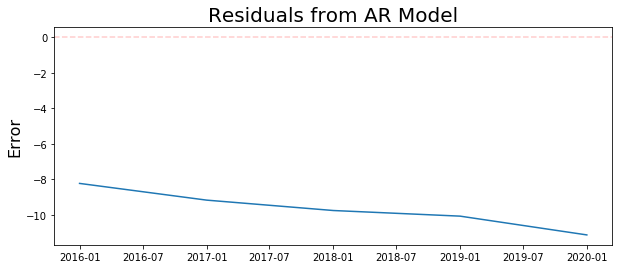

In [1003]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

# There is clear incresing pattern in the residuals which is not desirable 

In [1004]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 9.710203734960881


In [1005]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/tsa_debt_to_GDP_India.iloc[-3:])),4))

Mean Absolute Percent Error: 0.1705


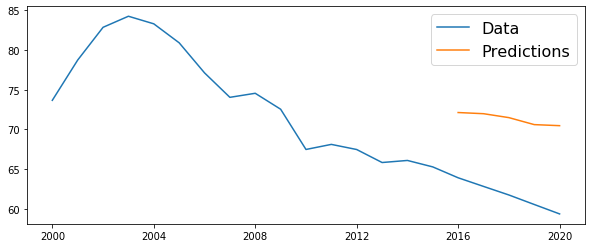

In [1006]:
plt.figure(figsize=(10,4))
plt.plot(tsa_debt_to_GDP_India)
plt.plot(predictions_ARMA)
plt.legend(('Data', 'Predictions'), fontsize=16)

# We can clearly see that the performance of the AR model is not great 

# Rolling Forecast Origin Concept (Without Log transfromation)

In [1124]:
prediction_rolling = pd.Series()
for end_date in test_data.index:
    train_data = tsa_debt_to_GDP_India[:end_date - timedelta(days=1)]
    model = ARMA(train_data, order=(4,0))
    model_fit = model.fit()
    pred = model_fit.predict(end_date)
    prediction_rolling.loc[end_date] = pred.loc[end_date]

In [1044]:
l = len(prediction_rolling)
residuals = tsa_debt_to_GDP_India.iloc[-l:] - prediction_rolling
residuals

Year
2016-01-01   -1.646601
2017-01-01   -1.970872
2018-01-01   -1.485668
2019-01-01   -1.268570
2020-01-01   -1.287547
dtype: float64

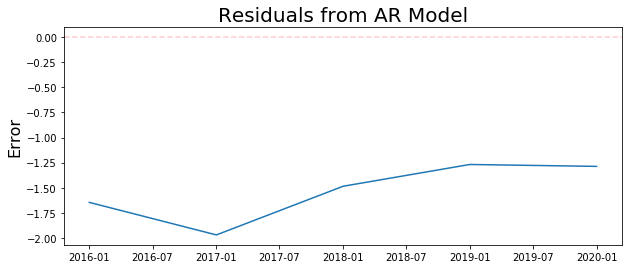

In [1047]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

In [1048]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 1.5536978361195406


In [1049]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/tsa_debt_to_GDP_India.iloc[-3:])),4))

Mean Absolute Percent Error: 0.0222


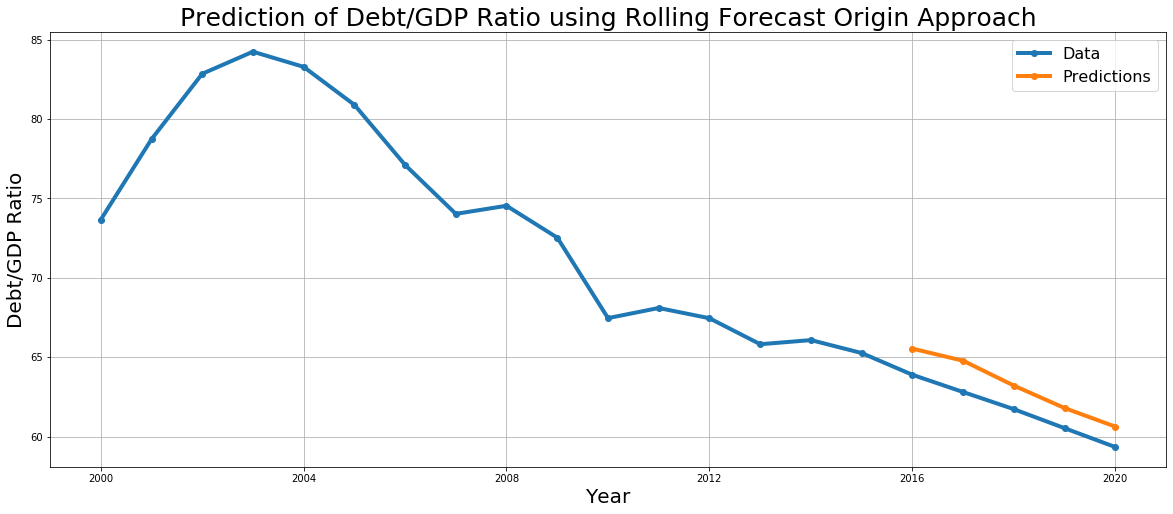

In [1064]:
plt.figure(figsize=(20,8))
plt.plot(tsa_debt_to_GDP_India, linewidth=4, marker = 'o')
plt.plot(prediction_rolling, linewidth=4, marker = 'o')
plt.xlabel('Year', fontsize=20)
plt.ylabel('Debt/GDP Ratio', fontsize=20)
plt.title('Prediction of Debt/GDP Ratio using Rolling Forecast Origin Approach', fontsize=25)
plt.grid()
plt.legend(('Data', 'Predictions'), fontsize=16)

# Now forecasting out of sample values 

In [1233]:
prediction_horizon = 1
data = np.zeros(prediction_horizon)
forecast_frame = pd.Series(data, index =[pd.to_datetime(tsa_debt_to_GDP_India.index[-1]
                                                        +timedelta(days=366))])
forecast_frame.index.name = 'Year'

for end_date in forecast_frame.index:
    train_data = tsa_debt_to_GDP_India[:end_date - timedelta(days=1)]
    model = ARMA(train_data, order=(4,0))
    model_fit = model.fit()
    pred = model_fit.forecast(prediction_horizon)
    forecast_frame[end_date] = pred[prediction_horizon - 1]
    forcasted_tsa = tsa_debt_to_GDP_India.append(forecast_frame)
    
pred_ci = forcasted_tsa.iloc[-2:]

# Plotting the forecasted values with the confidence interval band

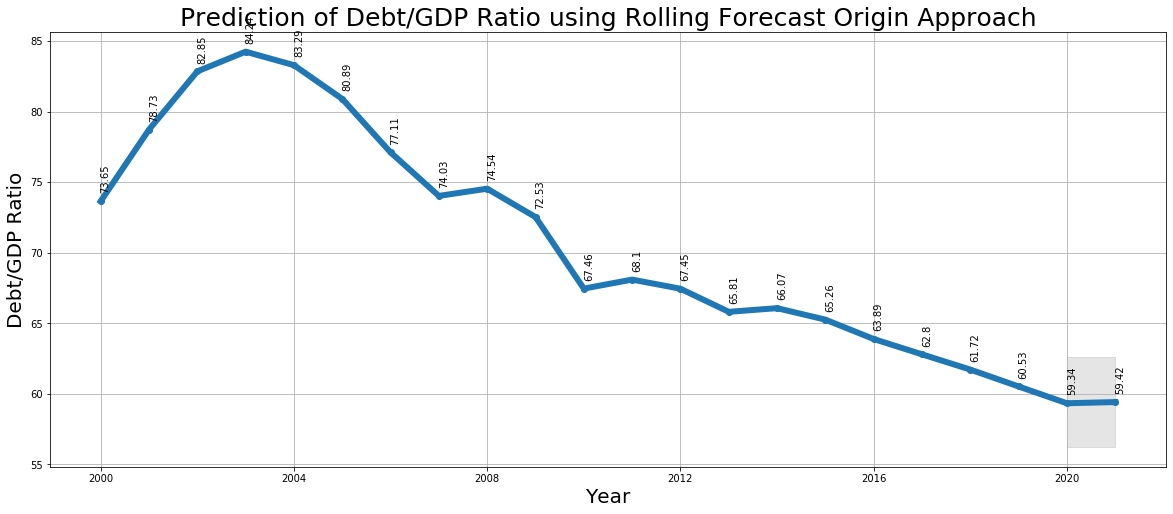

In [1309]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(forcasted_tsa, linewidth=6, marker = 'o')
ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Debt/GDP Ratio', fontsize=20)
ax.set_title('Prediction of Debt/GDP Ratio using Rolling Forecast Origin Approach', fontsize=25)
ax.fill_between(pred_ci.index,pred[-1][0][0],pred[-1][0][1], color='k', alpha=0.1)

plot_data = forcasted_tsa.reset_index()
plot_data[0] = round(plot_data[0], 2)

for i,j in zip(plot_data.iloc[:, 0], plot_data.iloc[:, 1]):
    ax.annotate('%s' %j, xy=(i,j), xytext=(0,10), textcoords='offset points', rotation=90)
    #ax.annotate('(%s,' %i, xy=(i,j))

ax.grid()
plt.show()